In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [8]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [9]:
## For this model, we will just focus on the Middle Linebacker position
mlb = df[df['Position'] == 'MLB']

In [10]:
##Make sure it actually selected what I wanted it to select
print(mlb['Position'].head())

1658    MLB
1659    MLB
1660    MLB
1661    MLB
1662    MLB
Name: Position, dtype: object


In [11]:
mlbcols = list(mlb.columns.values)

In [12]:
print(mlbcols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [13]:
## Removing non-numeric values
mlb1 = mlb[['Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic',
            'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping',
            'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position',
            'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed',
            'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 
            'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt',
            'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']]

In [14]:
##Let's find the positive significant correlations first.  There's way too many variables for us to view so let's try and sort them
mlb1.corr()

,Acceleration,Agility,Awareness,Ball Carrier Vision,Block Shedding,Carrying,Catch In Traffic,Catching,Elusiveness,Finesse Moves,...,Toughness,Trucking,Zone Coverage,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd
Acceleration,1.000000,0.445988,0.028996,0.202373,0.048306,0.077192,0.289619,0.271898,0.193460,0.111499,...,-0.117025,0.082114,0.170593,-0.140552,0.162192,-0.012311,0.176244,-0.106098,-0.085414,-0.275767
Agility,0.445988,1.000000,0.043742,0.224681,-0.003567,0.051341,0.267586,0.304827,0.358850,0.296429,...,-0.232544,-0.059261,0.264490,-0.194623,0.161156,-0.102003,0.247660,-0.082712,-0.023802,-0.231936
Awareness,0.028996,0.043742,1.000000,-0.220386,0.252444,0.160767,-0.299947,0.154388,-0.100743,-0.038427,...,0.079722,-0.200339,0.454459,-0.061050,0.172792,0.021536,0.138542,-0.033739,-0.136899,-0.231443
Ball Carrier Vision,0.202373,0.224681,-0.220386,1.000000,-0.132449,0.140570,0.534188,0.317623,0.519397,-0.009850,...,0.003360,0.508993,0.040005,-0.124979,0.026172,-0.019433,0.080829,-0.216996,-0.062154,-0.112364
Block Shedding,0.048306,-0.003567,0.252444,-0.132449,1.000000,-0.061767,-0.080560,0.046409,-0.144306,-0.015862,...,0.162452,-0.115401,0.062788,0.142515,-0.008691,0.005537,0.004340,0.057406,0.013915,-0.032894
Carrying,0.077192,0.051341,0.160767,0.140570,-0.061767,1.000000,0.131151,0.306315,0.082663,-0.013281,...,-0.053761,0.153905,0.205985,0.047842,0.096572,0.089034,0.026731,-0.091438,0.052095,-0.059896
Catch In Traffic,0.289619,0.267586,-0.299947,0.534188,-0.080560,0.131151,1.000000,0.426680,0.315292,-0.091228,...,0.011648,0.268550,0.062322,-0.167817,-0.041368,-0.087297,0.088316,-0.188247,-0.017657,-0.054699
Catching,0.271898,0.304827,0.154388,0.317623,0.046409,0.306315,0.426680,1.000000,0.168890,-0.102069,...,-0.098332,0.092070,0.357231,-0.087327,0.054942,-0.024169,0.102004,-0.175928,-0.081931,-0.133659
Elusiveness,0.193460,0.358850,-0.100743,0.519397,-0.144306,0.082663,0.315292,0.168890,1.000000,0.217794,...,-0.099595,0.176188,0.001262,-0.132969,0.102126,0.001860,0.150034,-0.110736,0.014391,-0.206414
Finesse Moves,0.111499,0.296429,-0.038427,-0.009850,-0.015862,-0.013281,-0.091228,-0.102069,0.217794,1.000000,...,-0.111075,-0.098736,0.006030,0.044055,0.053399,-0.042958,0.096663,-0.015983,0.052417,-0.086767


In [15]:
mlbcorr = mlb.corr()

In [16]:
mlbsigpos = mlbcorr[mlbcorr['Overall Rating'] >= 0.5]

In [17]:
## Here are our positive significant variables for the Middle Linebacker position
mlbsigpos['Overall Rating']

Awareness           0.918554
Block Shedding      0.508771
Overall Rating      1.000000
Play Recognition    0.911358
Pursuit             0.721360
Tackle              0.690329
Zone Coverage       0.518745
Name: Overall Rating, dtype: float64

In [18]:
## Now let's see if there are any significant negative correlations
mlbsigneg = mlbcorr[mlbcorr['Overall Rating'] <= -0.5]

In [19]:
##It looks like there aren't any significant negative correlations for this position
mlbsigneg

,Unnamed: 0,Acceleration,Agility,Awareness,Ball Carrier Vision,Block Shedding,Carrying,Catch In Traffic,Catching,Elusiveness,...,Toughness,Trucking,Zone Coverage,Wt,Vertical,Bench,Broad Jump,3Cone,Shuttle,40yd


In [20]:
mlbsig = mlb[['Awareness', 'Block Shedding', 'Man Coverage', 'Play Recognition', 'Pursuit', 'Stamina',
             'Tackle', 'Zone Coverage']]

In [22]:
##Now that we have the significant correlations, let's make sure we eliminate any multicollinearity by using VIF tests
## We will also add a constant
X = add_constant(mlbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#First, we will remove Awareness

const               658.849869
Awareness            16.870450
Block Shedding        1.546710
Man Coverage          3.326747
Play Recognition     16.700869
Pursuit               1.890565
Stamina               1.399324
Tackle                2.037299
Zone Coverage         3.710934
dtype: float64

In [27]:
mlb1 = mlb[['Block Shedding', 'Man Coverage', 'Play Recognition', 'Pursuit', 'Stamina',
             'Tackle', 'Zone Coverage']]

In [25]:
X=add_constant(mlb1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our vif scores are below 5, we can move on to statistical testing

const               656.418609
Block Shedding        1.544902
Man Coverage          3.326716
Play Recognition      1.854621
Pursuit               1.886924
Stamina               1.396988
Tackle                2.008008
Zone Coverage         3.703961
dtype: float64

In [26]:
MLB = sm.OLS(mlb['Overall Rating'], mlb1).fit()
print(MLB.summary())
#It looks like Zone Coverage is not a significant variable

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.951e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:40:02   Log-Likelihood:                -489.06
No. Observations:                 231   AIC:                             992.1
Df Residuals:                     224   BIC:                             1016.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Block Shedding       0.2425      0.026  

In [28]:
mlb2 = mlb[['Block Shedding', 'Man Coverage', 'Play Recognition', 'Pursuit', 'Stamina',
             'Tackle']]

In [30]:
MLB1 = sm.OLS(mlb['Overall Rating'], mlb2).fit()
print(MLB1.summary())
#Now all of our variables ar e significantly different from 0 and the AIC score went down a little bit

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.624e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:41:41   Log-Likelihood:                -489.20
No. Observations:                 231   AIC:                             990.4
Df Residuals:                     225   BIC:                             1011.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Block Shedding       0.2439      0.026  

In [31]:
def model():
    pv=0.2439*mlb['Block Shedding']+ 0.1431*mlb['Man Coverage'] + 0.5026*mlb['Play Recognition'] + 0.1025* mlb['Pursuit'] - .1680*mlb['Stamina']+ 0.1787*mlb['Tackle']
    return pv

In [32]:
mlb['Predicted Value'] = model()
mlb['Residual'] = mlb['Predicted Value'] - mlb['Overall Rating']

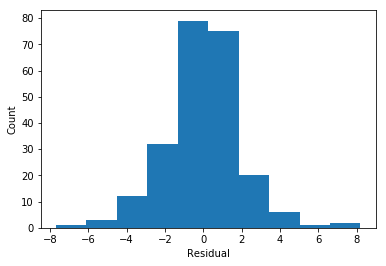

In [33]:
plt.hist(mlb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

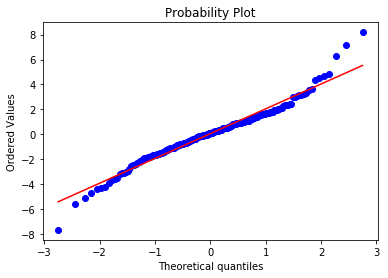

In [34]:
stats.probplot(mlb['Residual'], plot=plt)
plt.show()
#The residuals look very evenly distributed

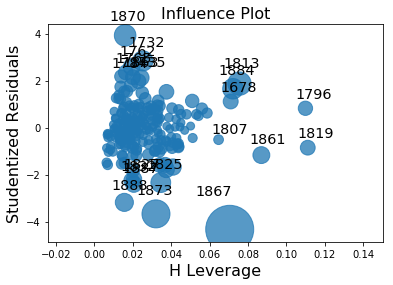

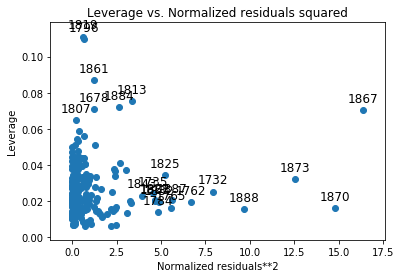

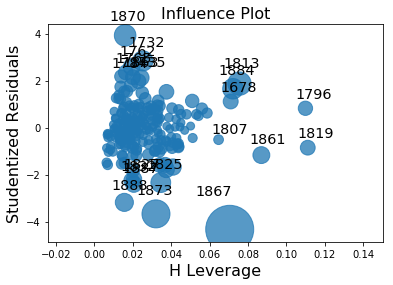

In [35]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(MLB1)
influence_plot(MLB1)

In [36]:
mlbul = mlb.drop(df.index[[1867, 1870, 1837]])

In [37]:
print(mlb.shape, mlbul.shape)

(231, 54) (228, 54)


In [38]:
mlbulsig = mlbul[['Block Shedding', 'Man Coverage', 'Play Recognition', 'Pursuit', 'Stamina',
             'Tackle']]

In [40]:
print(MLB1.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.624e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:46:52   Log-Likelihood:                -489.20
No. Observations:                 231   AIC:                             990.4
Df Residuals:                     225   BIC:                             1011.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Block Shedding       0.2439      0.026  

In [42]:
MLB2 = sm.OLS(mlbul['Overall Rating'], mlbulsig).fit()
print(MLB2.summary())
#All of our variables are still significant and the AIC score went down as well.

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.235e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:48:45   Log-Likelihood:                -466.81
No. Observations:                 228   AIC:                             945.6
Df Residuals:                     222   BIC:                             966.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Block Shedding       0.2514      0.024  

In [47]:
def model():
    pv=0.2514*mlbul['Block Shedding']+ 0.1328*mlb['Man Coverage'] + 0.5093*mlb['Play Recognition'] + 0.0733* mlb['Pursuit'] - 0.1607*mlb['Stamina']+ 0.1949*mlb['Tackle']
    return pv

In [48]:
mlbul['Predicted Value'] = model()
mlbul['Residual'] = mlbul['Predicted Value'] - mlbul['Overall Rating']
mlbulsig = mlbul[[]]

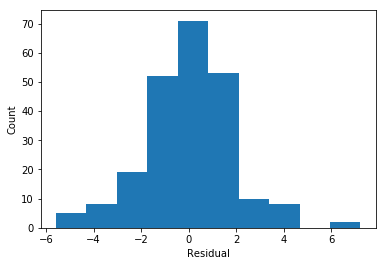

In [49]:
plt.hist(mlbul['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

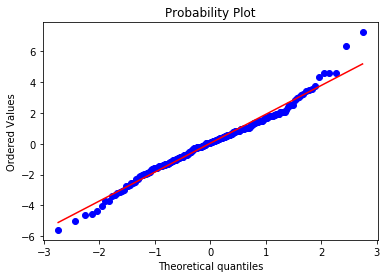

In [50]:
stats.probplot(mlbul['Residual'], plot=plt)
plt.show()
#The residuals look very evenly distributed

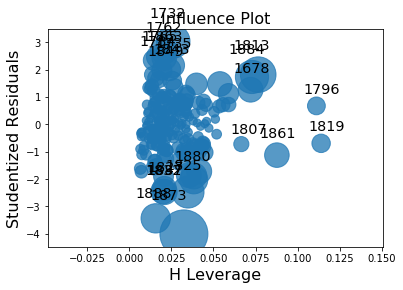

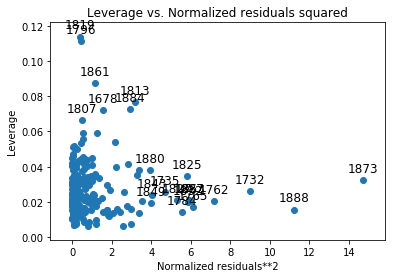

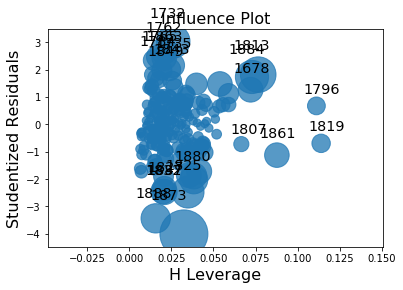

In [51]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(MLB2)
influence_plot(MLB2)
#There are still some high residuals but they do not have enough leverage where we need to remove them from the model.

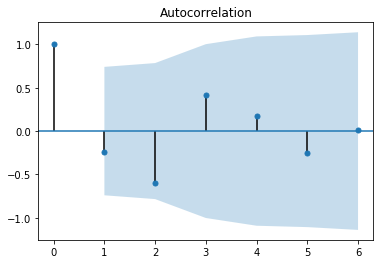

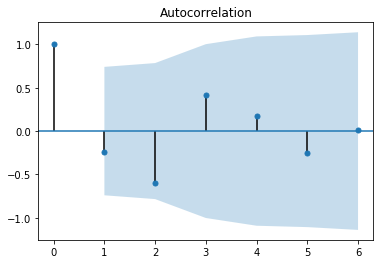

In [52]:
mlbcorr1 = mlbul[['Overall Rating', 'Block Shedding', 'Man Coverage', 'Play Recognition', 'Pursuit', 'Stamina',
             'Tackle']].corr()
plot_acf(mlbcorr1['Overall Rating'])
#There does not appear to be any significant amount of autocorrelation

In [53]:
#Finally, we check for homoskedasticity
het_breuschpagan(mlbul['Residual'], mlbulsig)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(61.98932261410723,
 4.713322902221611e-12,
 13.816008541369118,
 2.483808500697238e-13)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(mlbulsig, mlbul['Overall Rating'], test_size = 0.3, random_state =42)

In [55]:
reg=LinearRegression()

In [56]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
cbcv = cross_val_score(reg, mlbulsig, mlbul['Overall Rating'], cv=5)

In [59]:
cbcv_mean = np.mean(cbcv)

In [60]:
print(cbcv, cbcv_mean)

[0.98053819 0.97985809 0.97645506 0.95429215 0.90144897] 0.9585184914090898


In [70]:
###This model looks like it has the right variables in it.  Let's move on to the testing phase!

In [61]:
mlbdesc = mlbul[['Overall Rating', 'Block Shedding', 'Man Coverage', 'Play Recognition', 'Pursuit', 'Stamina',
             'Tackle']]
mlbdesc1 = mlbdesc.describe()
mlbdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\mlbdesc1.csv')

In [122]:
#Finally, we will test the new model
X_train, X_test, y_train, y_test = train_test_split(mlbclean1sig, mlbclean1['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
mlbcv = cross_val_score(reg, mlbclean1sig, mlbclean1['Overall Rating'], cv=5)
mlbcv_mean = np.mean(mlbcv)
print(mlbcv, mlbcv_mean)

[0.99007247 0.97928553 0.98319125 0.94316211 0.92530903] 0.9642040787175381
